# Supervised Learning with Python: Regression Analysis

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

I'll be investigating _Gapminder_ dataset in this Notebook.

## Exploring the Data

The dataset is seperated into two parts.
1. Independent variables (or features)
2. Response variable (or target)

In [3]:
df = pd.read_csv("datasets/gapminder.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [4]:
df.shape

(139, 10)

Gapminder dataset consists of 9 features or independent variables. The target or the response variable is **life expectancy** (life).

In [13]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [14]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


`df.corr()` gives us the pairwise correlation between variables.

In [5]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


Text(0.5,1,'Pairwise Correlation Between Variables')

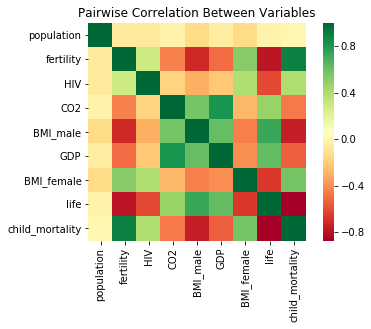

In [6]:
import seaborn as sns

sns.heatmap(df.corr(), square=True, cmap='RdYlGn').set_title('Pairwise Correlation Between Variables')

## Regression Analysis with _sklearn_

In [7]:
from sklearn.linear_model import LinearRegression

In [86]:
X = df.drop(['life', 'Region'], axis = 1).values # features (columns other than 'life')
y = df['life'].values # target

In [87]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

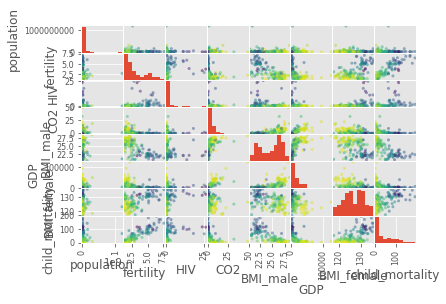

In [24]:
plt.style.use('ggplot')
pd.plotting.scatter_matrix(df.drop('life', axis = 1), c = y)
plt.show()

Let's fit a basic linear regression and predict life expectancy with only one feature: _fertility_. 

In [59]:
X_fertility = X[:, 1]
X_fertility.shape

(139,)

We'll now reshape the data. Note that "-1" means we want numpy to figure out the dimension.

In [62]:
y = y.reshape(-1, 1)
X_fertility = X_fertility.reshape(-1, 1)
X_fertility.shape

(139, 1)

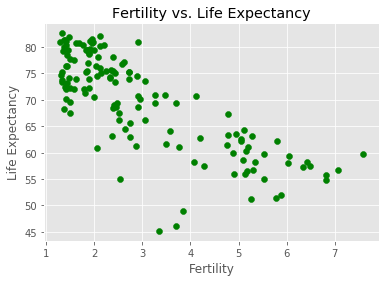

In [53]:
plt.scatter(X_fertility, y, color = 'green')
plt.title('Fertility vs. Life Expectancy')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()


In [79]:
# Create the regressor
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

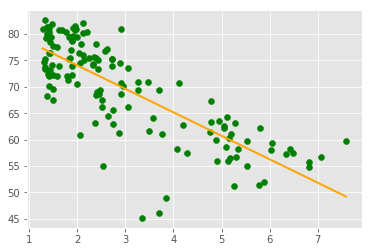

In [80]:
plt.scatter(X_fertility, y, color='green')
plt.plot(prediction_space, y_pred, color='orange', linewidth=2)
plt.show()

*R-squared* shows us how much of the variation can be explained by our model.  `.score()` method returns the coefficient of determination R^2 of the prediction.

In [56]:
print(reg.score(X_fertility, y))

0.6192442167740035


In [71]:
print('Coefficients: \n', reg.coef_, '\nIntercept: \n', reg.intercept_ )

Coefficients: 
 [[-4.44387899]] 
Intercept: 
 [82.95721362]


Our basic model with only one feature: (with LaTeX)
$$y = x(-4.44387899) + 82.95721362$$

I'll now print out the whole statistics.

In [76]:
import statsmodels.api as sm # import statsmodels 

X_fertility_sm = df['fertility']
y_sm = df['life']

X_fertility_sm = sm.add_constant(X_fertility_sm) ## Add an intercept (beta_0) to the model

model = sm.OLS(y, X_fertility_sm).fit() # sm.OLS(target, feature)
predictions = model.predict(X_fertility_sm)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           1.62e-30
Time:                        14:10:19   Log-Likelihood:                -436.91
No. Observations:                 139   AIC:                             877.8
Df Residuals:                     137   BIC:                             883.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.9572      1.015     81.740      0.000      80.950      84.964
fertility     -4.4439      0.298    -14.927      0.000      -5.033      -3.855
==============================================================================
Omnibus:                       38.234   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.501
Skew:                          -1.242   Prob(JB):                     2.98e-16
Kurtosis:                       5.485   Cond. No.                         7.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, let's fit a model over all features. First I'll split the dataset into training and testing sets.

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [90]:
reg_all = LinearRegression() # Create the regressor
reg_all.fit(X_train, y_train) # Fit the regressor to the training data

y_pred = reg_all.predict(X_test) # Predict on the test data

print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.8380468731430135


Root Mean Squared Error (RMSE) is another metric to assess regression models.

In [91]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.2476010800369455
